In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (16, 8)

Для начала прочитаем только заголовки датасета:

In [2]:
headers = pd.read_csv('Массив чеков_ver2.csv', nrows=0, encoding='utf-16').columns.tolist()
headers

['region',
 'userInn',
 'client_NT',
 'text_kktAddress',
 'Идентификатор покупателя',
 'dateTime',
 'Year',
 'Month',
 'receipt_id',
 'CLEAN_SKU',
 'price_items',
 'quantity_items',
 'sum_items',
 'totalSum',
 'RIGHTHOLDER_NT',
 'BRAND_NT',
 'CLASS_NT',
 'GROUP_NT',
 'CATEGORY_NT',
 'SUBCATEGORY_NT',
 'BASE_NT',
 'lat',
 'lon']

Можно сформировать отдельный список всех магазинов из датасета:

In [3]:
# Сформируем список магазинов из csv-файла, прочитав только колонки 'client_NT', 'text_kktAddress', 'lat', 'lon'
stores = pd.read_csv('Массив чеков_ver2.csv', usecols=['client_NT', 'text_kktAddress', 'lat', 'lon'], encoding='utf-16').drop_duplicates()
stores

,client_NT,text_kktAddress,lat,lon
0,Ашан,"г Москва, ул Ярцевская, д 19","55,7386329","37,4111005"
10,Окей,"г Москва, ул Озёрная, д 50","55,6647196","37,4372193"
31,Ашан,"г Москва, ш Бесединское, влд 15","55,625156","37,7611029"
52,Лента,"г Москва, ш Ярославское, д 54","55,8654562","37,7047982"
53,Ашан,"г Москва, пр-кт Рязанский, д 2 к 2","55,729868","37,730437"
...,...,...,...,...
11459803,Окей,"г Москва, ш Дмитровское, д 58А","55,8515572","37,5663772"
11462486,Окей,"г Москва, ш Дмитровское, влд 91А","55,870203","37,546893"
12469804,Окей,"г Москва, ш Дмитровское, д 41","55,833526","37,570788"
12580828,Окей,"г Москва, ш Дмитровское, д 107 стр 2а","55,878406","37,5413905"


И отдельный список торговых сетей:

In [4]:
trades = stores['client_NT'].drop_duplicates()
trades

0             Ашан
10            Окей
52           Лента
88     Гиперглобус
104      Metro c&c
Name: client_NT, dtype: object

In [5]:
# Сохраним результат в csv файл
stores.sort_values(['client_NT', 'text_kktAddress']).to_csv('Список магазинов.csv', index=False, encoding='utf-8')
stores

,client_NT,text_kktAddress,lat,lon
0,Ашан,"г Москва, ул Ярцевская, д 19","55,7386329","37,4111005"
10,Окей,"г Москва, ул Озёрная, д 50","55,6647196","37,4372193"
31,Ашан,"г Москва, ш Бесединское, влд 15","55,625156","37,7611029"
52,Лента,"г Москва, ш Ярославское, д 54","55,8654562","37,7047982"
53,Ашан,"г Москва, пр-кт Рязанский, д 2 к 2","55,729868","37,730437"
...,...,...,...,...
11459803,Окей,"г Москва, ш Дмитровское, д 58А","55,8515572","37,5663772"
11462486,Окей,"г Москва, ш Дмитровское, влд 91А","55,870203","37,546893"
12469804,Окей,"г Москва, ш Дмитровское, д 41","55,833526","37,570788"
12580828,Окей,"г Москва, ш Дмитровское, д 107 стр 2а","55,878406","37,5413905"


Переопределим некоторые типы данных для экономии места:

In [6]:
dtype_spec = {
    'region': 'category',
    'userInn': 'int64',
    'client_NT': 'category',
    'text_kktAddress': 'category',
    'Идентификатор покупателя': 'str',
    'dateTime': 'str', # после преобразуем в datetime
    'Year': 'int16',
    'Month': 'int16',
    'receipt_id': 'str',
    'CLEAN_SKU': 'str',
    'price_items': 'float32',
    'quantity_items': 'float32',
    'sum_items': 'float32',
    'totalSum': 'float32',
    'RIGHTHOLDER_NT': 'str',
    'BRAND_NT': 'category',
    'CLASS_NT': 'category',
    'GROUP_NT': 'category',
    'CATEGORY_NT': 'category',
    'SUBCATEGORY_NT': 'category',
    'BASE_NT': 'category',
    'lat': 'float32',
    'lon': 'float32'
}

Исходя из примера массива, повторяющиеся строки являются частью одного чека. Значит дубликаты строк не убираем

Загружаем датасет:

In [7]:
data = pd.read_csv('Массив чеков_ver2.csv', encoding='utf-16', dtype=dtype_spec, decimal=',').reset_index()

Если появляется ошибка памяти, то можно загрузить датасет частями:

In [8]:
# data = pd.DataFrame()
# chunk_size = 1000000
# for chunk in pd.read_csv('Массив чеков_ver2.csv', encoding='utf-16', dtype=dtype_spec, decimal=',', chunksize=chunk_size):
#     data = pd.concat([data, chunk], ignore_index=True)
# data  = data.reset_index()

Посмотрим первые 5 строк, чтобы убедиться, что всё подгрузилось правильно:

In [9]:
data.head(5)

,index,region,userInn,client_NT,text_kktAddress,Идентификатор покупателя,dateTime,Year,Month,receipt_id,...,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,0,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
1,1,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
2,2,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
3,3,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
4,4,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41


Проверим данные, например, чек номер `9960440300568774:126056`:

In [10]:
check = data[data['receipt_id'] == '9960440300568774:126056']
check

,index,region,userInn,client_NT,text_kktAddress,Идентификатор покупателя,dateTime,Year,Month,receipt_id,...,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,0,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
1,1,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
2,2,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
3,3,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
4,4,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
5,5,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
4881152,4881152,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,PEPSICO,АГУША,МЛДП,НЕ МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ ДЛЯ ДЕТЕЙ,ПЮРЕ МЯСНОЕ ДЕТ,ПЮРЕ МЯСНОЕ ДЕТСК,55.74,37.41
4881168,4881168,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,NaN,NaN,РЫБА,РЫБНАЯ ГАСТРОНОМИЯ,"ПАШТЕТЫ, РИЕТЫ, ЗАКУСКИ ИЗ РЫБЫ И МОРЕПРОДУКТОВ",ФОРШМАК,ФОРШМАК,55.74,37.41
4881169,4881169,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,KRAFT HEINZ COMPANY,HEINZ,NaN,NaN,NaN,NaN,NaN,55.74,37.41
4881170,4881170,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,...,3038.85,KRAFT HEINZ COMPANY,HEINZ,NaN,NaN,NaN,NaN,NaN,55.74,37.41


Проверим, что сумма по столбцу `sum_items` равна значению `totalSum`:

In [11]:
check['sum_items'].sum()

np.float32(3038.85)

Посмотрим общую информацию о датафрейме:

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595772 entries, 0 to 12595771
Data columns (total 24 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   index                     int64   
 1   region                    category
 2   userInn                   int64   
 3   client_NT                 category
 4   text_kktAddress           category
 5   Идентификатор покупателя  object  
 6   dateTime                  object  
 7   Year                      int16   
 8   Month                     int16   
 9   receipt_id                object  
 10  CLEAN_SKU                 object  
 11  price_items               float32 
 12  quantity_items            float32 
 13  sum_items                 float32 
 14  totalSum                  float32 
 15  RIGHTHOLDER_NT            object  
 16  BRAND_NT                  category
 17  CLASS_NT                  category
 18  GROUP_NT                  category
 19  CATEGORY_NT               category
 20  

Посмотрим описательные статистики для числовых столбцов:

In [13]:
data.describe()

,index,userInn,Year,Month,price_items,quantity_items,sum_items,totalSum,lat,lon
count,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00,12595772.00
mean,6297885.50,7733419176.02,2022.00,5.95,156.14,1.51,179.31,4545.63,55.72,37.58
std,3636086.32,45173411.27,0.00,0.83,220.91,2.80,317.08,3846.65,0.09,0.13
min,0.00,7703270067.00,2022.00,5.00,0.00,0.00,0.00,0.00,55.52,37.30
25%,3148942.75,7703270067.00,2022.00,5.00,56.14,1.00,64.99,2324.60,55.64,37.49
50%,6297885.50,7703270067.00,2022.00,6.00,98.90,1.00,114.39,3734.75,55.71,37.60
75%,9446828.25,7743543761.00,2022.00,7.00,179.98,1.00,203.98,5632.06,55.79,37.67
max,12595771.00,7826087713.00,2022.00,7.00,59990.00,2000.00,222146.09,286771.72,55.93,37.88


Посмотрим корреляционные отношения между числовыми столбцами

<Axes: >

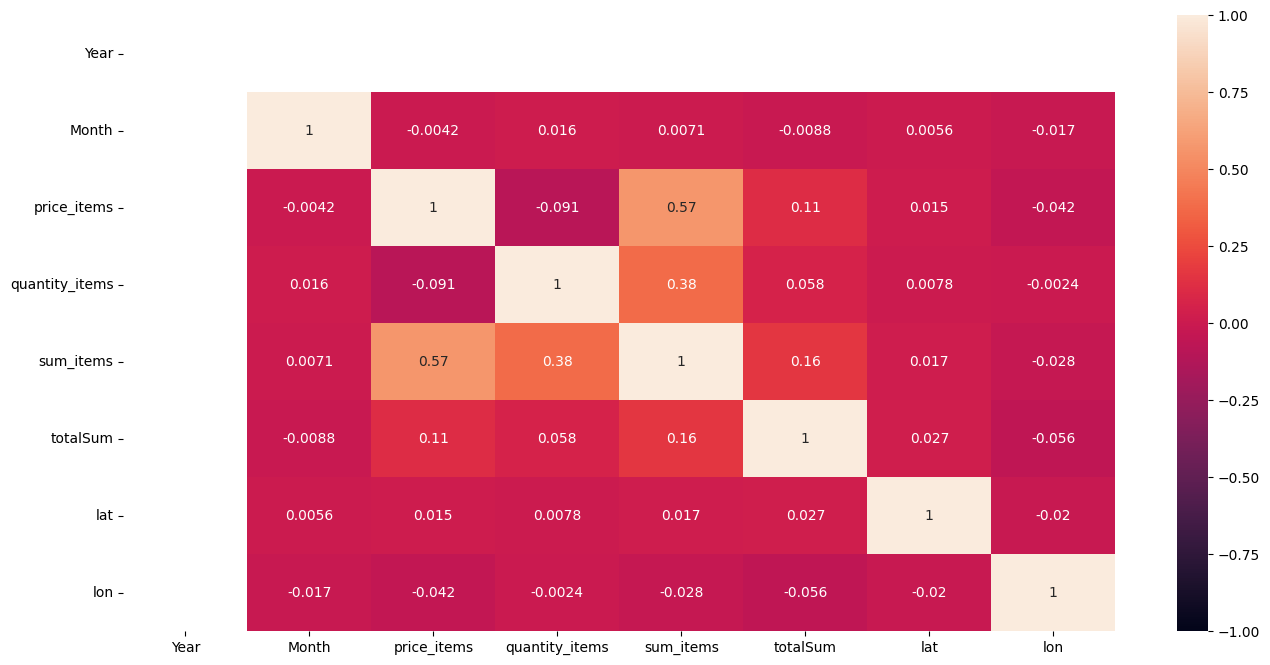

In [14]:
corr = data[['Year', 'Month', 'price_items', 'quantity_items', 'sum_items', 'totalSum', 'lat', 'lon']]
sns.heatmap(corr.corr(), vmax=1, vmin=-1, annot=True)

Практически везде слабая корреляционная зависимость, за исключением средней корреляционной зависимости sum_items - price_items

Добавим новые столбцы hour и weekday. И переименуем столбец "Идентификатор покупателя" в customer_id

In [15]:
data['hour'] = pd.to_datetime(data.dateTime).dt.hour

weekdays = {
    0: '1.Понедельник',
    1: '2.Вторник',
    2: '3.Среда',
    3: '4.Четверг',
    4: '5.Пятница',
    5: '6.Суббота',
    6: '7.Воскресенье'
    }
data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)

data = data.rename(columns={'Идентификатор покупателя': 'customer_id'})

C:\Temp\ipykernel_31224\2744415287.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data.dateTime).dt.hour
C:\Temp\ipykernel_31224\2744415287.py:12: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)


Сформируем таблицу со средним чеком по часам во всех торговых сетях для сравнения:

In [16]:
data.pivot_table(values='totalSum', index=['hour'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Ашан,Гиперглобус,Лента,Окей
hour,,,,,
0,3352.74,6921.29,4387.58,4723.05,2569.96
1,1585.64,NaN,3665.26,5090.33,NaN
2,2037.83,NaN,3447.70,2687.49,NaN
3,NaN,NaN,3139.39,2386.74,NaN
4,NaN,NaN,3933.96,2671.52,NaN
5,5753.68,3823.83,3716.82,2169.47,NaN
6,9618.62,4545.57,3591.68,1743.20,NaN
7,11677.56,4805.50,4164.67,3062.22,NaN
8,19272.52,4693.96,4797.16,3157.70,3154.71


Аналогично сформируем таблицу со средним чеком по дням недели во всех торговых сетях для сравнения:

In [17]:
data.pivot_table(values='totalSum', index=['weekday'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Ашан,Гиперглобус,Лента,Окей
weekday,,,,,
1.Понедельник,25221.43,4513.45,4538.43,3392.35,3783.38
2.Вторник,14043.83,4456.45,4563.11,3362.69,3787.82
3.Среда,14049.08,4528.67,4631.13,3300.61,3608.28
4.Четверг,21614.02,4659.46,4744.35,3654.81,3946.93
5.Пятница,12563.62,4825.28,5150.34,3691.30,4206.15
6.Суббота,11514.79,4793.88,4970.54,3823.94,4426.25
7.Воскресенье,10534.94,4583.71,4662.02,3591.18,4070.32


In [18]:
data[data['client_NT'] == 'Лента'].pivot_table(values='totalSum', index=['weekday'], columns=['text_kktAddress'], aggfunc='mean', observed=False)

text_kktAddress,"г Москва, Воскресенское п, проезд Чечёрский, д 51","г Москва, Московский п, км МКАД 47-й, влд 31 стр 1","г Москва, б-р Ореховый, д 22А","г Москва, пр-кт Волгоградский, д 177 стр 1","г Москва, пр-кт Ленинский, д 123В","г Москва, ул 7-я Кожуховская, д 9","г Москва, ул Бибиревская, д 10 к 2","г Москва, ул Большая Черёмушкинская, д 1","г Москва, ул Борисовские Пруды, д 26 к 2","г Москва, ш Дмитровское, д 116Д","г Москва, ш Ярославское, д 54","г Москва, б-р Ореховый, д 22"
weekday,,,,,,,,,,,,
1.Понедельник,3851.70,3904.94,3290.13,3491.33,3249.29,3485.87,3031.26,3301.94,2683.82,3259.57,2792.03,1653.50
2.Вторник,3529.80,4007.87,3388.86,3387.86,3065.70,3261.89,2972.39,3352.04,2681.46,3344.88,3017.32,1153.91
3.Среда,3439.83,3715.74,3179.65,3143.19,3334.90,3323.26,3045.28,3390.36,2773.54,3098.14,3315.27,1232.81
4.Четверг,4060.55,4005.39,3414.93,3395.74,3400.29,4009.68,3325.62,3725.20,2796.36,3824.02,3086.87,1679.28
5.Пятница,4140.15,3808.91,3728.13,3692.16,3412.25,3692.12,3283.67,3887.04,3109.94,3638.91,3421.28,1539.08
6.Суббота,4131.37,4143.60,3756.81,4148.97,3751.24,4175.07,3360.46,3647.11,2969.07,3736.24,3445.59,2540.29
7.Воскресенье,4050.29,3742.08,3526.05,3623.83,3492.36,3588.27,2890.55,3460.50,3052.63,3707.38,3511.00,1875.30


Проведём ABC-анализ для каждой троговой сети.

Классифицируем товары `CLEAN_SKU` по прибыли и количеству проданных позиций. А так же по `CATEGORY_NT` по количеству проданных позиций

In [19]:
def perform_abc(df, index):
    cols = list(df.columns)
    for i in index:
        cols.remove(i)
    groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
    for col in cols:
        groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
        groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    return groupped_df[cols + [f'abc_{col}' for col in cols]]

In [20]:
abc_all_SKU = data[['client_NT', 'CLEAN_SKU', 'price_items', 'quantity_items']].dropna()
abc_all_SKU

,client_NT,CLEAN_SKU,price_items,quantity_items
0,Ашан,РИЕТ ПУТИНА КРАБ 100,109.00,1.00
1,Ашан,РИЕТ ПУТИНА КРАБ 100,109.00,1.00
2,Ашан,КРЕПЫШ КЕФИР 200Г,9.99,1.00
3,Ашан,КРЕПЫШ КЕФИР 200Г,9.99,1.00
4,Ашан,КРЕПЫШ КЕФИР 200Г,9.99,1.00
...,...,...,...,...
12595767,Ашан,ПЕЧ.С МОЛ.НАЧИН.240Г,169.90,1.00
12595768,Ашан,ЯС ВАТНЫЕ ДИСКИ 50ШТ,57.99,2.00
12595769,Ашан,КУК.ПАЛ.КУЗЯ ЛАКОМК.100Г,46.99,1.00
12595770,Ашан,ВИНОГРАД БЕЛЫЙ КИШ-МИШ ВЕС,149.90,0.92


In [21]:
abc_SKU = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_abc(abc_all_SKU[abc_all_SKU['client_NT'] == trade], ['client_NT', 'CLEAN_SKU']).reset_index()
    tmp['client_NT'] = trade
    abc_SKU = pd.concat([abc_SKU, tmp], ignore_index=True).dropna()
abc_SKU

,CLEAN_SKU,price_items,quantity_items,abc_price_items,abc_quantity_items,client_NT
0,БАНАНЫ ВЕС,6672430.50,96160.91,A,A,Ашан
1,КАРТОФЕЛЬ ЕГИПЕТ ВЕС,1808119.75,53564.73,A,A,Ашан
2,ЛУК РЕПЧАТЫЙ ВЕС,3034811.25,49285.08,A,A,Ашан
3,САХАР-ПЕСОК 1КГ,1370688.38,42652.00,A,A,Ашан
4,КАПУСТА БК ВЕС,881662.00,39029.09,A,A,Ашан
...,...,...,...,...,...,...
207093,275Г ПАСТРОМА ИНДИЛАЙТ ИНДЕЙКИ С/К,1020.84,0.30,B,C,Metro c&c
207094,ОГУРЦЫ БАКИНСКИЕ,399.00,0.28,B,C,Metro c&c
207095,200Г СЫР ПАРРЕДЖИО T-G 40% БЗМЖ,1762.15,0.24,A,C,Metro c&c
207096,400Г КОЛБАСА КНЯЖЕСКАЯ ТРАПЕЗА С/К РЕМИТ,555.46,0.22,B,C,Metro c&c


In [22]:
abc_all_CATEGORY = data[['client_NT', 'CATEGORY_NT', 'quantity_items']].dropna()
abc_all_CATEGORY

,client_NT,CATEGORY_NT,quantity_items
0,Ашан,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,1.00
1,Ашан,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,1.00
2,Ашан,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,1.00
3,Ашан,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,1.00
4,Ашан,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,1.00
...,...,...,...
12595766,Ашан,КАША ПИТЬЕВАЯ,1.00
12595768,Ашан,ВАТНАЯ И БУМАЖНАЯ ПРОДУКЦИЯ,2.00
12595769,Ашан,КУКУРУЗНЫЕ ПАЛОЧКИ,1.00
12595770,Ашан,ЯГОДЫ,0.92


In [23]:
abc_CATEGORY = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_abc(abc_all_CATEGORY[abc_all_CATEGORY['client_NT'] == trade], ['client_NT', 'CATEGORY_NT']).reset_index()
    tmp['client_NT'] = trade
    abc_CATEGORY = pd.concat([abc_CATEGORY, tmp], ignore_index=True).dropna()
abc_CATEGORY = abc_CATEGORY.rename(columns={'abc_quantity_items': 'abc_quantity_items_CAT'})
abc_CATEGORY


C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(index[1]).agg({col: 'sum' for col in cols})
C:\Temp\ipykernel_31224\3440270023.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupped_df = df.groupby(

,CATEGORY_NT,quantity_items,abc_quantity_items_CAT,client_NT
0,КОРНЕПЛОДЫ,368666.97,A,Ашан
1,ВОДА,360362.00,A,Ашан
2,МОЛОКО,357273.81,A,Ашан
3,ОВОЩИ ОСНОВНЫЕ,334836.69,A,Ашан
4,"ЗООКОРМ, ЛАКОМСТВА ДЛЯ КОШЕК",331118.00,A,Ашан
...,...,...,...,...
2230,ЗИМНИЙ СПОРТИВНЫЙ ИНВЕНТАРЬ,0.00,C,Metro c&c
2231,ХЕРЕС,0.00,C,Metro c&c
2232,ГЛИНТВЕЙН,0.00,C,Metro c&c
2233,ПОЛУФАБРИКАТЫ МЯСНЫЕ ЗАМОРОЖЕННЫЕ,0.00,C,Metro c&c


In [24]:
xyz_data = data[['client_NT', 'CLEAN_SKU', 'dateTime', 'quantity_items']]
xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям
xyz_data

C:\Temp\ipykernel_31224\347484163.py:2: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям
C:\Temp\ipykernel_31224\347484163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xyz_data['dateTime'] = pd.to_datetime(xyz_data['dateTime']).dt.strftime('%W') # По неделям


,client_NT,CLEAN_SKU,dateTime,quantity_items
0,Ашан,РИЕТ ПУТИНА КРАБ 100,25,1.00
1,Ашан,РИЕТ ПУТИНА КРАБ 100,25,1.00
2,Ашан,КРЕПЫШ КЕФИР 200Г,25,1.00
3,Ашан,КРЕПЫШ КЕФИР 200Г,25,1.00
4,Ашан,КРЕПЫШ КЕФИР 200Г,25,1.00
...,...,...,...,...
12595767,Ашан,ПЕЧ.С МОЛ.НАЧИН.240Г,30,1.00
12595768,Ашан,ЯС ВАТНЫЕ ДИСКИ 50ШТ,30,2.00
12595769,Ашан,КУК.ПАЛ.КУЗЯ ЛАКОМК.100Г,30,1.00
12595770,Ашан,ВИНОГРАД БЕЛЫЙ КИШ-МИШ ВЕС,30,0.92


In [25]:
def perform_xyz(df, date_col, index_cols, value_col):
    # Группировка и агрегация (сумма quantity_items по неделям)
    grouped = df.groupby(index_cols + [date_col])[value_col].sum().reset_index()
    # Фильтрация SKU с достаточным количеством недель (>1)
    sku_week_counts = grouped.groupby(index_cols)[date_col].count().reset_index()
    valid_skus = sku_week_counts[sku_week_counts[date_col] > 1][index_cols]
    filtered = pd.merge(grouped, valid_skus, on=index_cols)
    
    # Расчет коэффициента вариации
    cv_result = (filtered.groupby(index_cols)[value_col]
                 .apply(lambda x: x.std()/x.mean())
                 .reset_index(name='cv'))
    
    # 6. Классификация XYZ
    cv_result['XYZ'] = np.where(cv_result['cv'] < 0.1, 'X', np.where(cv_result['cv'] < 0.25, 'Y', 'Z'))
    
    return cv_result

In [26]:
xyz_SKU = pd.DataFrame()
for trade in trades:
    tmp = pd.DataFrame()
    tmp = perform_xyz(xyz_data[xyz_data['client_NT'] == trade], date_col='dateTime', index_cols=['CLEAN_SKU'], value_col='quantity_items')
    tmp['client_NT'] = trade
    xyz_SKU = pd.concat([xyz_SKU, tmp], ignore_index=True).dropna()
xyz_SKU

,CLEAN_SKU,cv,XYZ,client_NT
0,!ИРОЖНОЕ БИСКВ КЛУБНИЧ 240 Г.,0.54,Z,Ашан
1,!ТБ КРИС/БЕЛ OX/ACT 1КГ VANISH,0.77,Z,Ашан
2,"""""""""""БАГЕТ ПАРИЖСКИЙ 400Г""",0.28,Z,Ашан
3,"""""""""""БАГЕТ ПШЕНИЧ.С КУНЖУТОМ 250Г""",0.78,Z,Ашан
4,"""""""""""БАГЕТ ПШЕНИЧНЫЙ 250Г""",0.38,Z,Ашан
...,...,...,...,...
157912,ЯЙЦО КУРИНОЕ С1 ЭКСТРА МЫТОЕ 10 ШТ РОСКАР,0.47,Z,Metro c&c
157913,ЯЙЦО ПФ ФЕДОРОВСКАЯ СВОБОДНЫЙ ВЫГУЛ СО 9ШТ,0.55,Z,Metro c&c
157914,ЯЙЦО С1 10 ШТ ВОЛЖАНИН БЕЛОЕ,0.29,Z,Metro c&c
157915,ЯЙЦО СО 10 ШТ ВОЛЖАНИН БЕЛОЕ,0.94,Z,Metro c&c


Теперь соединим результаты abc_SKU, abc_CATEGORY, xyz_SKU в один датафрейм и выгрузим в pickle-файл

In [27]:
analysis_df = pd.DataFrame()
analysis_df = pd.merge(data, abc_SKU, on=['client_NT', 'CLEAN_SKU'], how='left')
analysis_df = pd.merge(analysis_df, abc_CATEGORY, on=['client_NT', 'CATEGORY_NT'], how='left')
analysis_df = pd.merge(analysis_df, xyz_SKU, on=['client_NT', 'CLEAN_SKU'], how='left')
analysis_df = analysis_df[['region', 'userInn', 'client_NT', 'text_kktAddress', 
                            'customer_id', 'dateTime', 'receipt_id', 'CLEAN_SKU', 'price_items_x',
                            'abc_price_items', 'abc_quantity_items', 'abc_quantity_items_CAT', 'XYZ', 
                            'quantity_items', 'sum_items', 'totalSum',
                            'RIGHTHOLDER_NT', 'BRAND_NT', 'CLASS_NT', 'GROUP_NT', 'CATEGORY_NT',
                            'SUBCATEGORY_NT', 'BASE_NT', 'lat', 'lon']]
analysis_df

,region,userInn,client_NT,text_kktAddress,customer_id,dateTime,receipt_id,CLEAN_SKU,price_items_x,abc_price_items,...,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,9960440300568774:126056,РИЕТ ПУТИНА КРАБ 100,109.00,C,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
1,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,9960440300568774:126056,РИЕТ ПУТИНА КРАБ 100,109.00,C,...,3038.85,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.74,37.41
2,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,9960440300568774:126056,КРЕПЫШ КЕФИР 200Г,9.99,B,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
3,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,9960440300568774:126056,КРЕПЫШ КЕФИР 200Г,9.99,B,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
4,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,9960440300568774:126056,КРЕПЫШ КЕФИР 200Г,9.99,B,...,3038.85,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.74,37.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595767,МОСКВА,7703270067,Ашан,"г Москва, б-р Ходынский, д 4",NaN,30.07.2022 14:04:00,9960440301300727:69908,ПЕЧ.С МОЛ.НАЧИН.240Г,169.90,B,...,2260.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.79,37.53
12595768,МОСКВА,7703270067,Ашан,"г Москва, б-р Ходынский, д 4",NaN,30.07.2022 14:04:00,9960440301300727:69908,ЯС ВАТНЫЕ ДИСКИ 50ШТ,57.99,A,...,2260.36,не определено,Я САМАЯ,КЗБХ,УХОД И ГИГИЕНА,ВАТНАЯ И БУМАЖНАЯ ПРОДУКЦИЯ,ВАТНЫЕ ДИСКИ,ДИСКИ ВАТНЫЕ,55.79,37.53
12595769,МОСКВА,7703270067,Ашан,"г Москва, б-р Ходынский, д 4",NaN,30.07.2022 14:04:00,9960440301300727:69908,КУК.ПАЛ.КУЗЯ ЛАКОМК.100Г,46.99,A,...,2260.36,РУССКАРТ,КУЗЯ ЛАКОМКИН,БАКЛ,"ЗАКУСКИ К АПЕРИТИВАМ (СНЕКИ, ЧИПСЫ)",КУКУРУЗНЫЕ ПАЛОЧКИ,КУКУРУЗНЫЕ ПАЛОЧКИ,ПАЛОЧКИ КУКУРУЗНЫЕ,55.79,37.53
12595770,МОСКВА,7703270067,Ашан,"г Москва, б-р Ходынский, д 4",NaN,30.07.2022 14:04:00,9960440301300727:69908,ВИНОГРАД БЕЛЫЙ КИШ-МИШ ВЕС,149.90,A,...,2260.36,NaN,NaN,ФРОВ,СВЕЖИЕ ФРУКТЫ,ЯГОДЫ,ВИНОГРАД,ВИНОГРАД,55.79,37.53


In [ ]:
# Сохраним результаты ABC|XYZ-анализа в pcl файл
analysis_df.to_pickle('ABC-XYZ.pcl.gz', compression='gzip')
# Можно скачать его https://disk.yandex.ru/d/aVAb0DY98upb3w

In [ ]:
# Если надо загрузить, то можно воспользоваться:
# abc_xyz = pd.read_pickle('ABC-XYZ.pcl.gz', compression='gzip')